In [1]:
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt

In [2]:
# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

# Read in raster image 
img_ds = gdal.Open('s2_b2.tif', gdal.GA_ReadOnly)
b = img_ds.RasterCount
print (b)

1


In [3]:
#For single band classification
band = img_ds.GetRasterBand(1)

#Getting shape of the image 
img = band.ReadAsArray()
print (img.shape)
#for classifier we need to reshape it using .reshape(-1,1) 
X = img.reshape((-1,1))
print (X.shape)

(1770, 2607)
(4614390, 1)


In [4]:
#choosing no. of  classes
k_means = cluster.KMeans(n_clusters=8)
#tie out data to it
k_means.fit(X)
#assigninig labels
X_cluster = k_means.labels_
#reshaping w.r.t our image
X_cluster = X_cluster.reshape(img.shape)



Plot the classified image

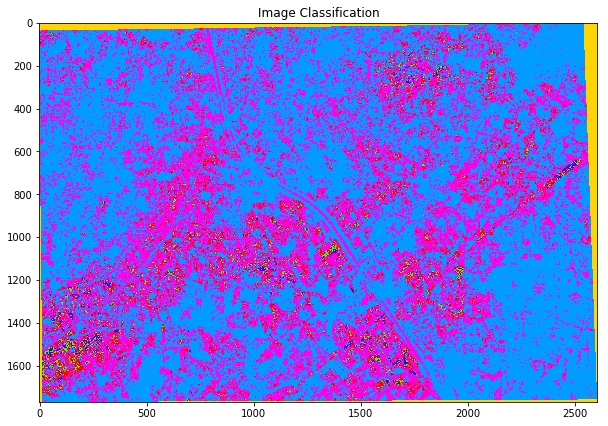

In [7]:
%matplotlib inline  

import matplotlib.pyplot as plt
#figure size
plt.figure(figsize=(10,10))
#ploting X_cluster
plt.title('Image Classification')
plt.imshow(X_cluster, cmap="hsv")
plt.show()


What about using all 13 bands of Sentinel 2?

In [8]:


# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

# Read in raster image 
img_ds = gdal.Open('stack.tif', gdal.GA_ReadOnly)
if img_ds is None:
    print("Failed to Open")
else:
    print('Successful')

Successful


In [9]:
#loading image into numpy
img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))
#looping bands 
for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()
#shaping it     
new_shape = (img.shape[0] * img.shape[1], img.shape[2])
print (img.shape)
print (new_shape)
#reshaping with respect to bands i.e 4
X = img[:, :, :8].reshape(new_shape)

print (X.shape)

(1770, 2607, 4)
(4614390, 4)
(4614390, 4)


Now fit it

In [ ]:
#choosing no. of  classes
k_means = cluster.KMeans(n_clusters=8)
#fiting our data(X) to it
k_means.fit(X)
#assigninig labels
X_cluster = k_means.labels_
#reshaping w.r.t our image
X_cluster = X_cluster.reshape(img[:, :, 0].shape)
if X_cluster is not None:
    print('Successfull')


And plot

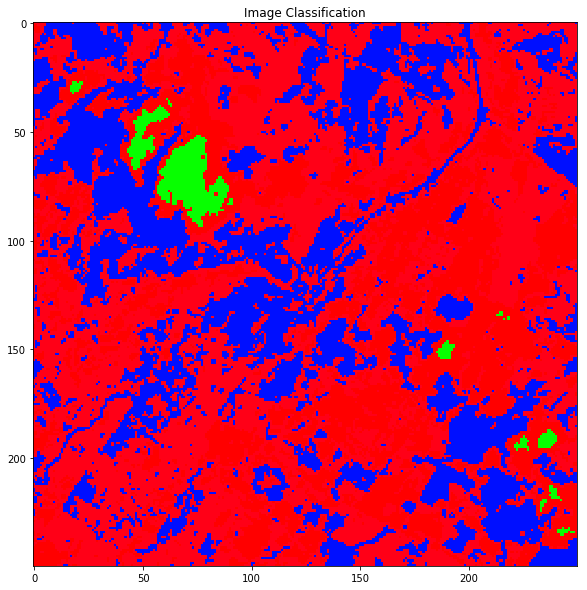

In [41]:
%matplotlib inline  

import matplotlib.pyplot as plt
#figure size
plt.figure(figsize=(10,10))
#ploting X_cluster
plt.title('Image Classification')
plt.imshow(X_cluster, cmap="hsv")
plt.show()

Changing the classification is straight forward. In this example choose MiniBatchKMeans

In [39]:
MB_KMeans = cluster.MiniBatchKMeans(n_clusters=4)
MB_KMeans.fit(X)

X_cluster = MB_KMeans.labels_


X_cluster = X_cluster.reshape(img[:, :, 0].shape)

Plot the result

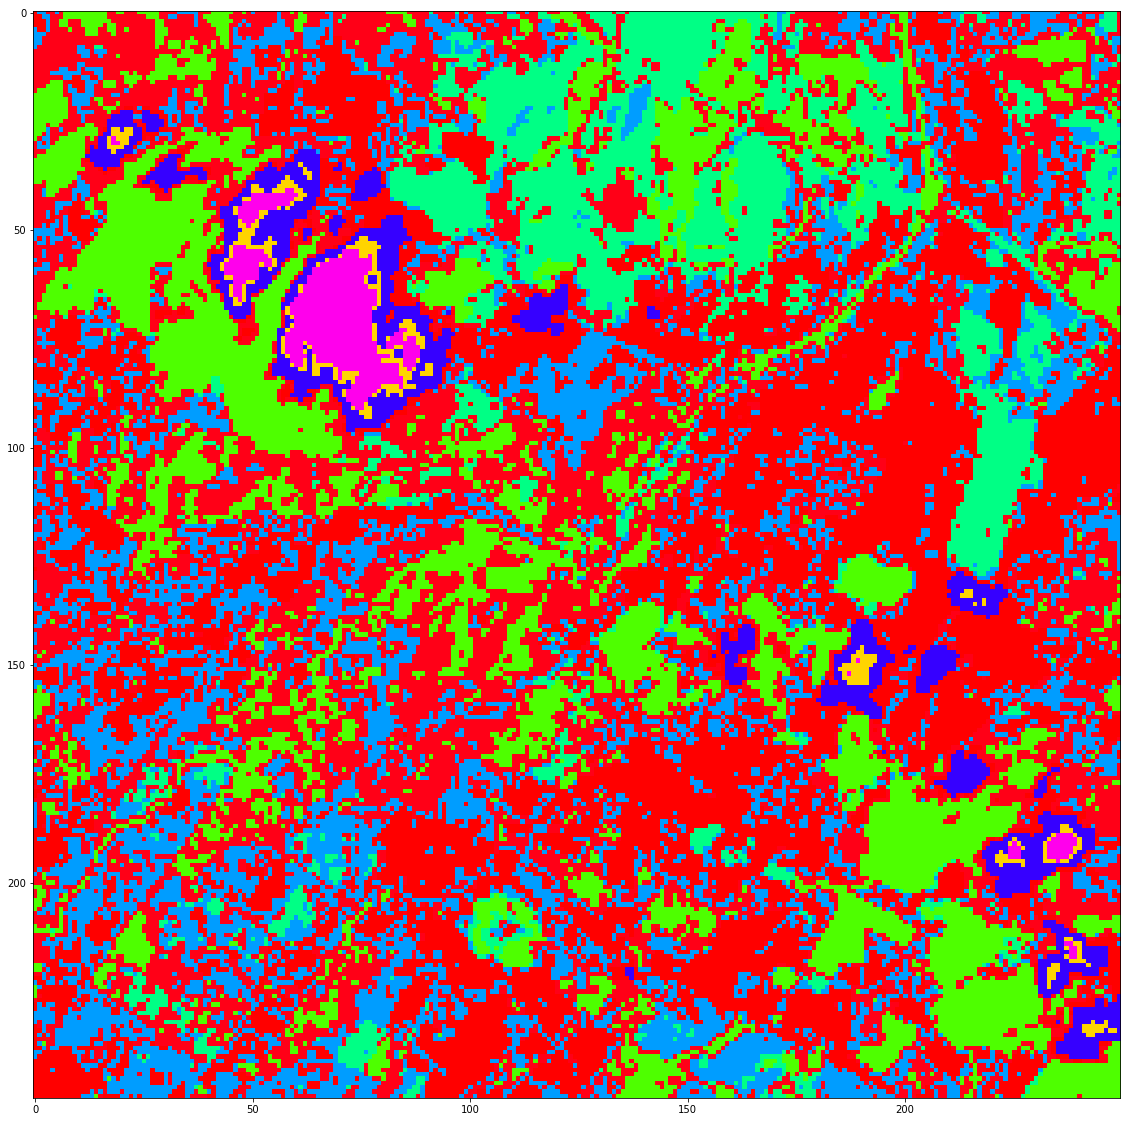

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()